# Statistiques

Ce notebook va vous présenter le nombre d'occurance de chaque mot du mémoire de plus de quatres lettres.

95


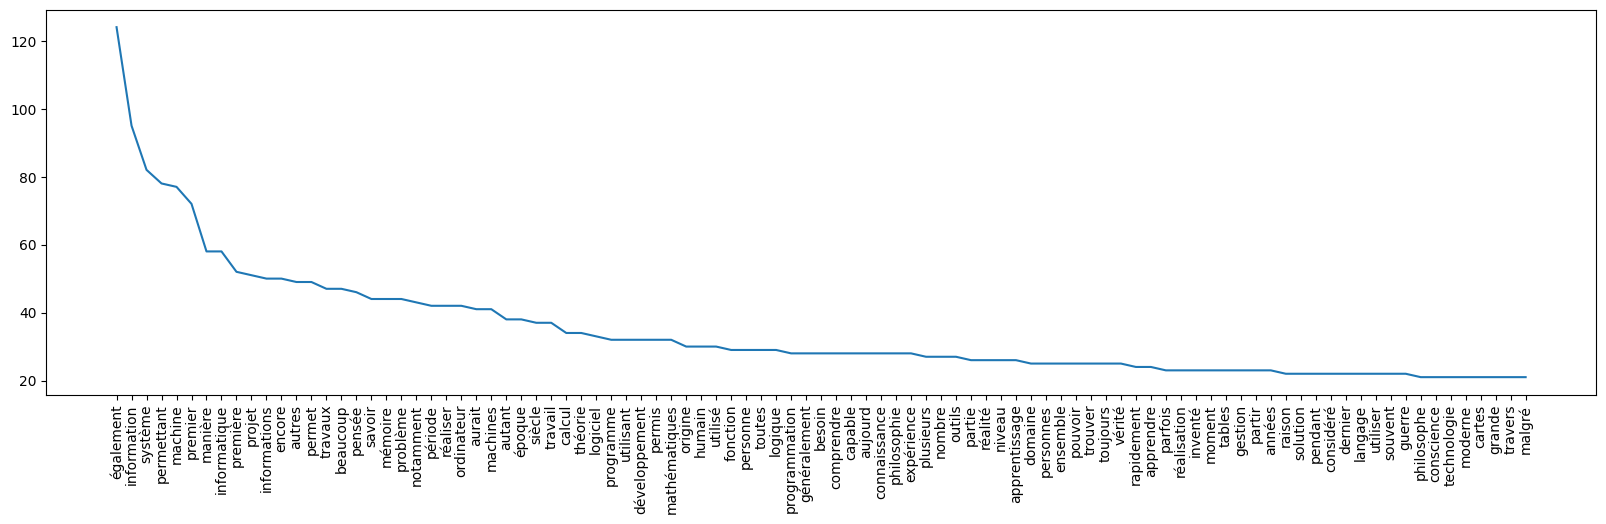

In [6]:
import pandas as pan;
import numpy as np;
import io;
import matplotlib.pyplot as plt;

f = io.open("HistoirePhilosophieInformation.md", mode="r", encoding="utf-8")
text = f.read()

charactersToRemove = ["#", "*", ",", "."]
for char in charactersToRemove:
    text = text.replace(char, "")

charactersToReplaceBySpace = ["'", "’"]
for char in charactersToReplaceBySpace:
    text = text.replace(char, " ")

lines = text.split("\n")
def removeEmptyStr(item):
    return item != ""
words = list(
    filter(removeEmptyStr, " ".join(lines).split(" "))
)

values_count = pan.Series(words).value_counts();

values_more_than_5_letters = values_count[values_count.index.str.len() > 5].loc[lambda x : x > 20]

values_count_over_70 = values_count.loc[lambda x : x > 70]
values_count_35_70 = values_count.loc[lambda x : (x > 35) & (x <= 70)]
values_count_17_34 = values_count.loc[lambda x : (x > 17) & (x <= 35)]
values_count_3_16 = values_count.loc[lambda x : (x > 3) & (x <= 16)]

def displaySerie(serie): 
    print(len(serie.index))
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    plt.plot(serie.index, serie.values)
    plt.show()

displaySerie(values_more_than_5_letters)
# displaySerie(values_count_over_70)
# displaySerie(values_count_35_70)
# displaySerie(values_count_17_34)
# displaySerie(values_count_3_16)